In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./results10000000.csv')

In [232]:
# Filas resumen donde el numero es Na
summary_df = df[df['number'].isna()]

# Filas por cada numero
number_df = df[df['number'].notna()]

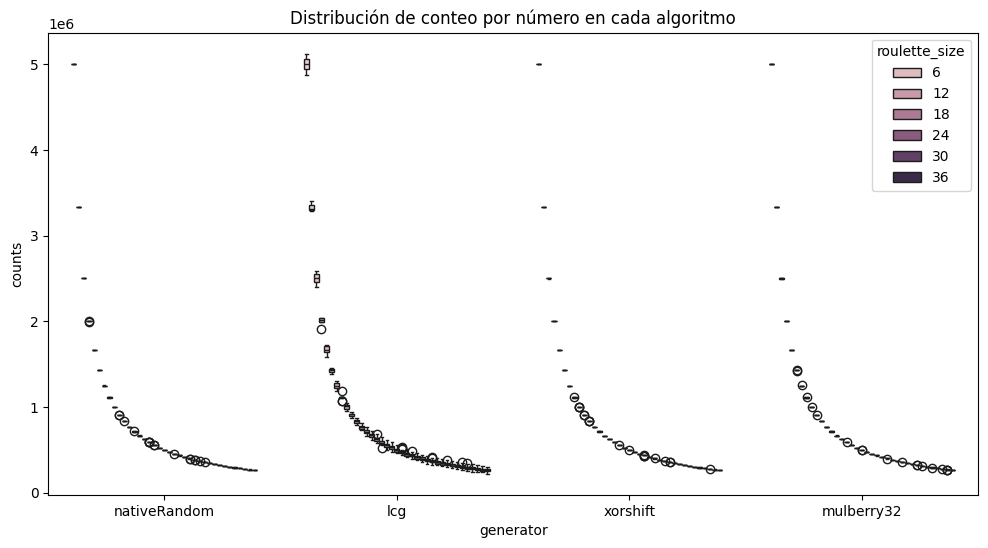

In [233]:
#Uniformidad de los numeros
plt.figure(figsize=(12, 6))
sns.boxplot(data=number_df, x='generator', y='counts', hue='roulette_size')
plt.title('Distribución de conteo por número en cada algoritmo')
plt.show()

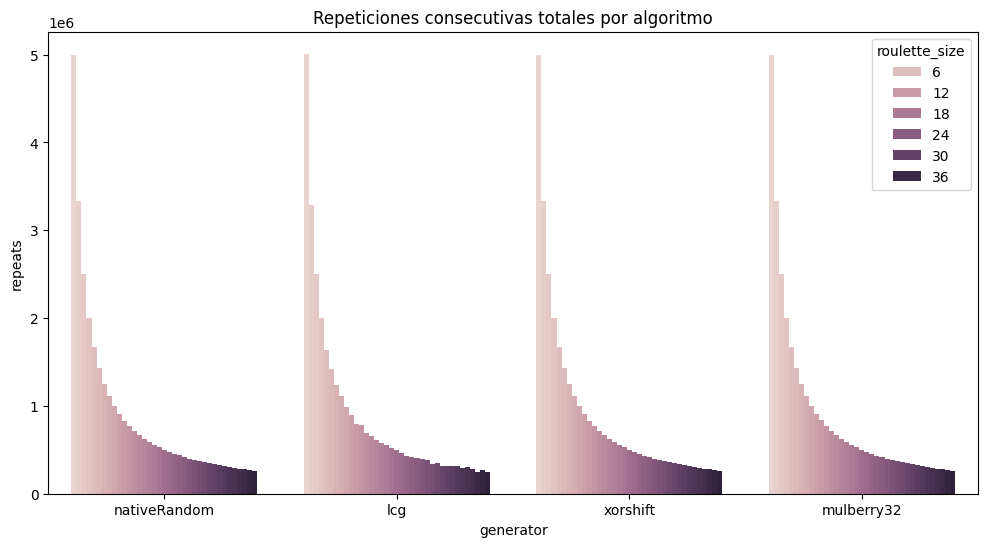

In [234]:
#Repeticiones consecutivas
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='generator', y='repeats', hue='roulette_size')
plt.title('Repeticiones consecutivas totales por algoritmo')
plt.show()

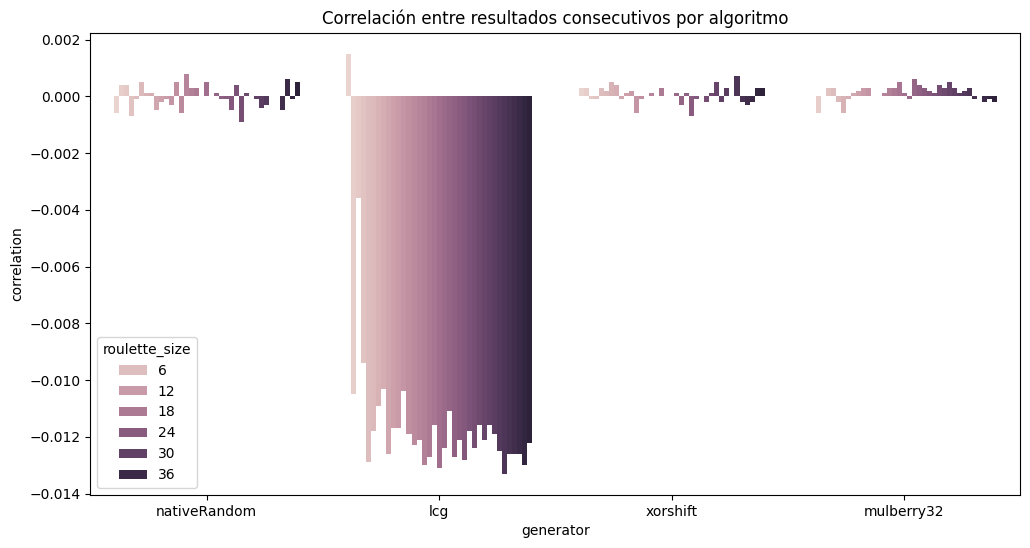

In [235]:
#Correlación
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='generator', y='correlation', hue='roulette_size')
plt.title('Correlación entre resultados consecutivos por algoritmo')
plt.show()

In [236]:
# Menos repeticiones y menos correlación = mejor
summary_df['score'] = (summary_df['repeats'].rank(ascending=True) +
                       summary_df['correlation'].abs().rank(ascending=True))
summary_df.sort_values('score', inplace=True)
#print(summary_df[['generator', 'roulette_size', 'score']])

/tmp/ipykernel_11924/1614595382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df['score'] = (summary_df['repeats'].rank(ascending=True) +
/tmp/ipykernel_11924/1614595382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df.sort_values('score', inplace=True)


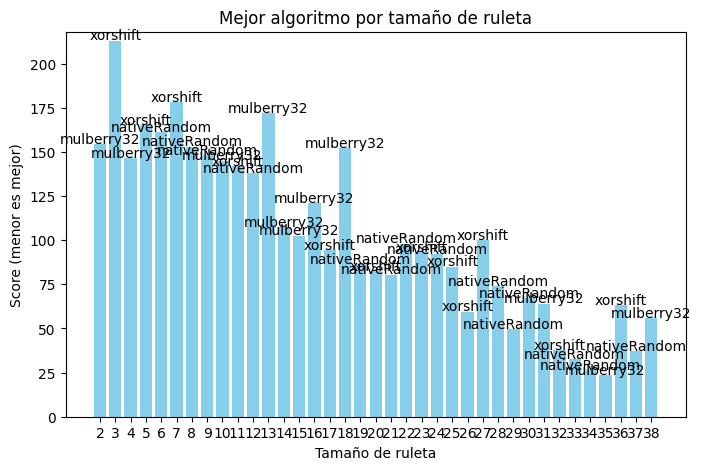

In [237]:
#Mejor algoritmo por cada tamaño
best_per_size = summary_df.loc[summary_df.groupby('roulette_size')['score'].idxmin()]

plt.figure(figsize=(8,5))
plt.bar(best_per_size['roulette_size'].astype(str), best_per_size['score'], color='skyblue')
for i, row in best_per_size.iterrows():
    plt.text(str(row['roulette_size']), row['score'] + 0.5, row['generator'], ha='center')

plt.title('Mejor algoritmo por tamaño de ruleta')
plt.xlabel('Tamaño de ruleta')
plt.ylabel('Score (menor es mejor)')
plt.ylim(0, best_per_size['score'].max() + 5)
plt.show()

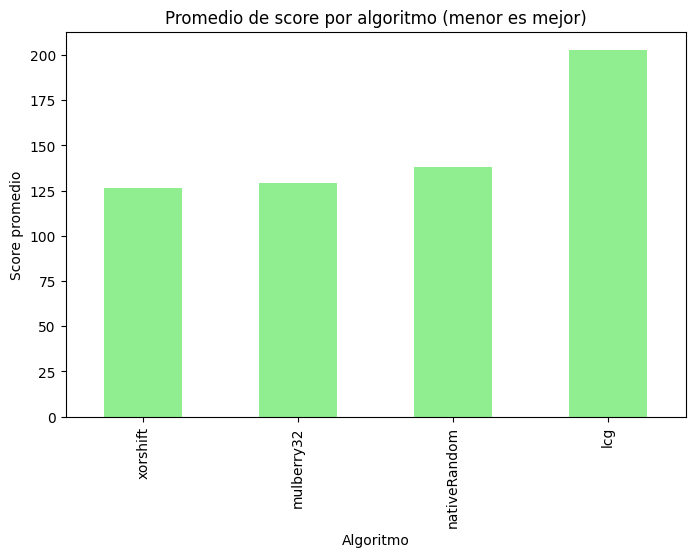

In [238]:
mean_scores = summary_df.groupby('generator')['score'].mean().sort_values()

plt.figure(figsize=(8,5))
mean_scores.plot(kind='bar', color='lightgreen')
plt.title('Promedio de score por algoritmo (menor es mejor)')
plt.ylabel('Score promedio')
plt.xlabel('Algoritmo')
plt.show()

## Resultados de mejor algoritmo

- 10k: Js Native Random 
- 100k: Xorshift
- 1M: Xorshift
- 10M : Xorshift


## Conclusión
Usar Xorshift o Random de la libreria estándar de JS